<a href="https://colab.research.google.com/github/jaoviedoc/Estructuras_Hidraulicas/blob/main/Transiciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transiciones
  Cambios en el fondo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Datos iniciales { run: "auto" }
Q = 10 #@param {type:"number"}   # m^3 . s^-1    #Caudal del canal
b = 4 #@param {type:"number"}   # m             #Ancho en la base
y1 = 2.5 #@param {type:"number"}   # m             #Profundidad canal
Δz = .2 #@param {type:"number"}  # m             #medida del escalon
g = 9.81 # m . s^-2
Δh = Δz*.8


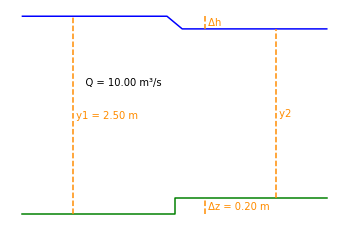

In [ ]:
#@title
# Dibujo del canal
x_Canal = np.array([0, 15, 15, 30])
y_Canal = np.array([0, 0, Δz, Δz])
plt.plot(x_Canal, y_Canal, color='g')

# Dibujo superficie del agua
x_agua = np.array([0, 15*0.95, 15*1.05, 30])
y_agua = np.array([y1, y1, y1-Δh, y1-Δh])
plt.plot(x_agua, y_agua, color='b')

# Cota y1
x_E_y = np.array([5, 5])
y_E_y = np.array([0, y1])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota Δz
x_E_y = np.array([18, 18])
y_E_y = np.array([0, Δz])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota Δh
x_E_y = np.array([18, 18])
y_E_y = np.array([y1, y1-Δh])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota y2
x_E_y = np.array([25, 25])
y_E_y = np.array([Δz, y1-Δh])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

#Textos
plt.text(5, 2*y1/3 ,  f'    Q = {Q:.2f} m³/s' , ha='left', va='center', c='k')
plt.text(5, y1/2 ,  f' y1 = {y1:.2f} m' , ha='left', va='center', c='darkorange')
plt.text(18, Δz/2 ,  f' Δz = {abs(Δz):.2f} m' , ha='left', va='center', c='darkorange')
plt.text(18, (y1-Δh + y1)/2 , ' Δh', ha='left', va='center', c='darkorange')
plt.text(25, (y1-Δh + Δz)/2 ,  ' y2', ha='left', va='center', c='darkorange')

plt.axis('off')
plt.show()

1. Calculo de $E_{1}$

In [ ]:
E1 = y1 + ((Q**2)/((b*y1)**2 *2*g))
print("El valor de E1 es:", round(E1, 2), "m")

El valor de E1 es: 2.55 m


2. Conservación de energia especifica entre 1 y 2

In [ ]:
E2 = E1 - Δz
print("El valor de E2 es:", round(E2, 2), "m")

El valor de E2 es: 2.35 m


3. Cálculo de y2

In [ ]:
#@title
#Raices del polinomio
#E2 = y2 + ((Q**2)/((b*y2)**2 *2*g))
#E2 * y2 ** 2 = y**3 + ((Q**2)/(b**2 *2*g))
p = [1, -E2, 0, (Q**2) / (b**2 * 2 * g)]

raices = np.roots(p)

#Ordena de mayor a menor
Raices = np.sort(raices)[::-1]

#evalua y deja solo los resultados mayores a 0
indices_Tipo_Flujo = np.where(Raices > 0)[0]
Tipo_Flujo_2 = Raices[indices_Tipo_Flujo]

print("El valor de y2 subcritico es:  ", round(Tipo_Flujo_2[0], 3), "m")
print("El valor de y2 supercritico es:", round(Tipo_Flujo_2[1], 3), "m")

El valor de y2 subcritico es:   2.29 m
El valor de y2 supercritico es: 0.405 m


4. Calcular Yc

In [ ]:
from math import sqrt
#Definicion de la ecuación del numero de Froude
# 1 = Q /((b*y_c) * sqrt(g*y_c))
# Q = (b*y_c) * sqrt(g*y_c)

y_c = (Q / (b * sqrt(g)))**(2/3)
print("El valor de y_c es:", round(y_c, 3), "m")

El valor de y_c es: 0.86 m


5. Tipo de flujo en 1

In [ ]:
#@title
#Para definir el tipo de flujo
if y1 > y_c:
  Tipo_Flujo = 'Subcritico'
elif y1 < y_c:
  Tipo_Flujo = 'Supercritico'
else:
  Tipo_Flujo = 'Critico'

Tip_Fluj_1 = Tipo_Flujo
print("El tipo de Flujo en 1 es:", Tip_Fluj_1)

El tipo de Flujo en 1 es: Subcritico


6. Profundidad en 2

In [ ]:
#@title
if Tip_Fluj_1 == 'Subcritico':
  y2 = Tipo_Flujo_2[0]
elif Tip_Fluj_1 == 'Supercritico':
  y2 = Tipo_Flujo_2[1]

print("El tipo de Flujo en 2 es:", Tip_Fluj_1, ", con un valor de y2 =", round(y2,3), "m")

El tipo de Flujo en 2 es: Subcritico , con un valor de y2 = 2.29 m


7. Calcular $Δh$

In [ ]:
Δh = y1-y2-Δz
print("El valor de Δh es:", round(Δh,3), "m")

El valor de Δh es: 0.01 m


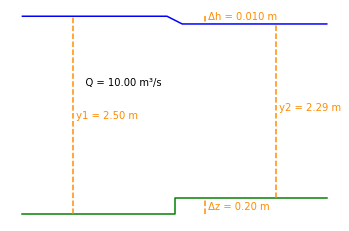

In [ ]:
#@title

#Multiplicador de escala para Δh
M_Δh = 10

# Dibujo del canal
x_Canal = np.array([0, 15, 15, 30])
y_Canal = np.array([0, 0, Δz, Δz])
plt.plot(x_Canal, y_Canal, color='g')

# Dibujo superficie del agua
x_agua = np.array([0, 15*0.95, 15*1.05, 30])
y_agua = np.array([y1, y1, y1-(Δh*M_Δh), y1-(Δh*M_Δh)])
plt.plot(x_agua, y_agua, color='b')

# Cota y1
x_E_y = np.array([5, 5])
y_E_y = np.array([0, y1])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota Δz
x_E_y = np.array([18, 18])
y_E_y = np.array([0, Δz])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota Δh
x_E_y = np.array([18, 18])
y_E_y = np.array([y1, y1-(Δh*M_Δh)])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

# Cota y2
x_E_y = np.array([25, 25])
y_E_y = np.array([Δz, y1-(Δh*M_Δh)])
plt.plot(x_E_y, y_E_y, color='darkorange', linestyle='--')

#Textos
plt.text(5, 2*y1/3 ,  f'    Q = {Q:.2f} m³/s' , ha='left', va='center', c='k')
plt.text(5, y1/2 ,  f' y1 = {y1:.2f} m' , ha='left', va='center', c='darkorange')
plt.text(18, Δz/2 ,  f' Δz = {abs(Δz):.2f} m' , ha='left', va='center', c='darkorange')
plt.text(18, (y1-Δh + y1)/2 , f' Δh = {abs(Δh):.3f} m', ha='left', va='center', c='darkorange')
plt.text(25, (y1-Δh + Δz)/2 ,  f' y2 = {y2:.2f} m', ha='left', va='center', c='darkorange')

plt.axis('off')
plt.show()

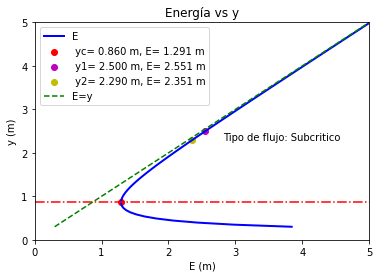

In [ ]:
#@title

#Linea de Energia especifica
y_range = np.linspace(0.3, 5, 100)
E = y_range + ((Q**2)/(((b*y_range)**2)*2*g))
plt.plot(E, y_range, c = 'b', linewidth=2, label = 'E')

#Punto Y critico
y_cric = y_c
E_c = y_cric + ((Q**2)/(((b*y_cric)**2)*2*g))
plt.scatter(E_c, y_cric, c='r', label=f' yc= {y_c:.3f} m, E= {E_c:.3f} m')

#Linea Y critica
E_rango_c = np.array([0, 5])
y_rango_c = np.array([y_c, y_c])
plt.plot(E_rango_c, y_rango_c, c = 'r', linestyle='-.')

#Punto Y1 dado en el ejercicio
E_y_1 = y1 + ((Q**2)/(((b*y1)**2)*2*g))
plt.scatter(E_y_1, y1, c='m', label=f' y1= {y1:.3f} m, E= {E_y_1:.3f} m')

#Punto Y2 dado en el ejercicio
E_y_2 = y2 + ((Q**2)/(((b*y2)**2)*2*g))
plt.scatter(E_y_2, y2, c='y', label=f' y2= {y2:.3f} m, E= {E_y_2:.3f} m')

#tipo de flujo
plt.text(E_y_2*1.2, y2, f"Tipo de flujo: {Tipo_Flujo}")

#Linea a 45° o E=y
E_igual_Y = y_range
plt.plot(E_igual_Y, y_range, c = 'g', label = 'E=y', linestyle='--')

#Formato grafica
plt.xlabel('E (m)')
plt.ylabel('y (m)')
plt.title('Energía vs y')
plt.legend()
plt.axis([0, 5, 0, 5])
plt.show()